In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

from keras.preprocessing import image
from keras.preprocessing.image import save_img
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import save_img
%matplotlib inline

from mpl_toolkits.axes_grid1 import ImageGrid
import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

In [ ]:
new_model=tf.keras.models.load_model('denoising-11-5.h5')

# Check its architecturea
new_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      18464     
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 16)      4624      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 16)      6

In [ ]:
def noisy_image(image):

  noise =  np.random.normal(loc=0, scale=1, size=img.shape)

  noisy = np.clip((img + noise*0.2),0,1)

  noisy = cv2.resize(noisy, (256, 256)) 

  return noisy

In [ ]:
face_images = glob.glob('test/*.jpg')

In [ ]:
all_images = []

for i in tqdm(face_images):
  img = image.load_img(i, target_size=(256,256,3))
  img = image.img_to_array(img)
  img = img/255.
  img = noisy_image(img)
  all_images.append(img)

100%|██████████| 3/3 [00:00<00:00, 33.51it/s]


In [ ]:
all_images = np.array(all_images)
predictions = new_model.predict(all_images)

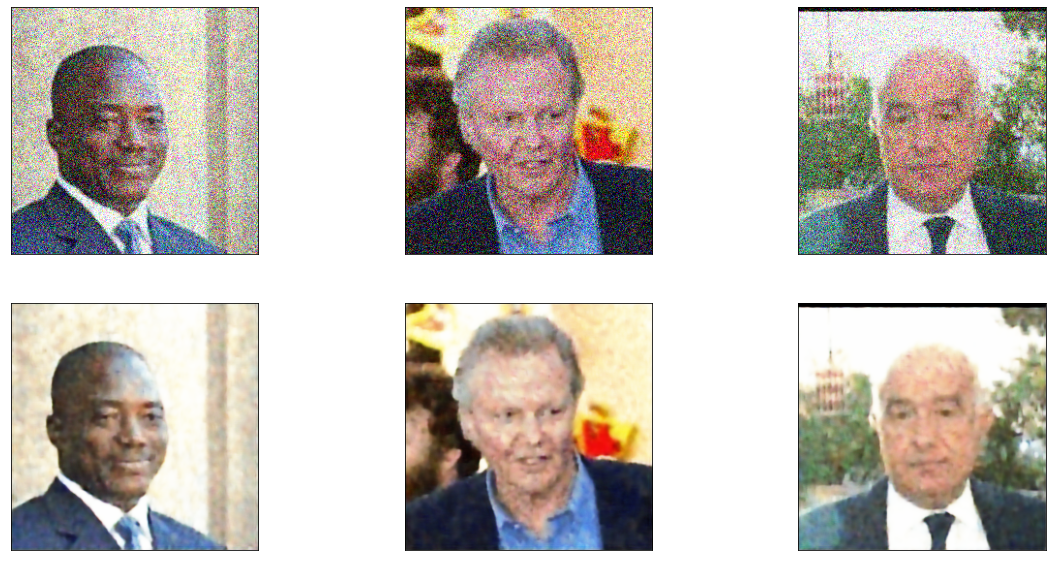

In [ ]:
n =3
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(all_images[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[n])
  #save_img(f'{i}.jpg', predictions[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)